In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Загрузить датасет в DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/OlgaDidenko/share-price/main/MOEX_200331_230331.csv')

# Вывести первые 5 строк датасета
print(df.head())

# Вывести описательные статистики
print(df.describe())

  <TICKER>  <PER>    <DATE>  <TIME>  <OPEN>  <HIGH>  <LOW>  <CLOSE>    <VOL>
0     gazp     60  20200331  110000   93.85   95.98  93.70    95.41  3435570
1     gazp     60  20200331  120000   95.40   96.00  95.11    95.94  1337370
2     gazp     60  20200331  130000   95.91   96.50  95.76    96.14  1858240
3     gazp     60  20200331  140000   96.10   96.30  95.51    96.13  1075250
4     gazp     60  20200331  150000   96.04   96.45  94.79    95.24  1658420
        <PER>        <DATE>         <TIME>       <OPEN>       <HIGH>  \
count  9666.0  9.666000e+03    9666.000000  9666.000000  9666.000000   
mean     60.0  2.021288e+07  155381.750466   135.652177   136.086306   
std       0.0  9.072356e+03   53317.312224    33.870228    33.897539   
min      60.0  2.020033e+07       0.000000    69.710000    73.650000   
25%      60.0  2.021010e+07  130000.000000   103.282500   103.660000   
50%      60.0  2.021091e+07  160000.000000   142.845000   143.370000   
75%      60.0  2.022070e+07  19000

In [2]:
df.shape

(9666, 9)

In [3]:
# Проверяем количество нулевых значений
print(df.isnull().sum())

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<OPEN>      0
<HIGH>      0
<LOW>       0
<CLOSE>     0
<VOL>       0
dtype: int64


In [4]:
# заменить названия колонок
new_column_names = []
for col_name in df.columns:
    new_column_names.append(col_name.replace('<', '').replace('>', ''))

df.columns = new_column_names

# вывести первые 5 строк обновленного датасета
print(df.head())

  TICKER  PER      DATE    TIME   OPEN   HIGH    LOW  CLOSE      VOL
0   gazp   60  20200331  110000  93.85  95.98  93.70  95.41  3435570
1   gazp   60  20200331  120000  95.40  96.00  95.11  95.94  1337370
2   gazp   60  20200331  130000  95.91  96.50  95.76  96.14  1858240
3   gazp   60  20200331  140000  96.10  96.30  95.51  96.13  1075250
4   gazp   60  20200331  150000  96.04  96.45  94.79  95.24  1658420


In [5]:
# создать новую колонку 'PRICE_NEXT_DAY' со значениями цены акций на следующий день
df['PRICE_NEXT_DAY'] = df['CLOSE'].shift(-1)

# удалить последнюю строку, так как у нее нет значения 'PRICE_NEXT_DAY'
df = df[:-1]

# вывести первые 5 строк обновленного датасета
print(df.head())

  TICKER  PER      DATE    TIME   OPEN   HIGH    LOW  CLOSE      VOL  \
0   gazp   60  20200331  110000  93.85  95.98  93.70  95.41  3435570   
1   gazp   60  20200331  120000  95.40  96.00  95.11  95.94  1337370   
2   gazp   60  20200331  130000  95.91  96.50  95.76  96.14  1858240   
3   gazp   60  20200331  140000  96.10  96.30  95.51  96.13  1075250   
4   gazp   60  20200331  150000  96.04  96.45  94.79  95.24  1658420   

   PRICE_NEXT_DAY  
0           95.94  
1           96.14  
2           96.13  
3           95.24  
4           95.71  


In [6]:
# разделить данные на обучающую и тестовую выборки
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# определить признаки и целевую переменную
X_train = train_data[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL']]
y_train = train_data['PRICE_NEXT_DAY']
X_test = test_data[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL']]
y_test = test_data['PRICE_NEXT_DAY']

In [8]:
# Создание и обучение модели линейной регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)

# Прогнозирование цены акции
y_pred_lr = lr.predict(X_test)

# Оценка точности модели с помощью метрики RMSE
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'RMSE Linear Regression: {lr_rmse}')

RMSE Linear Regression: 0.4389590439281791


In [9]:
# Создание и обучение модели решающих деревьев
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Прогнозирование цены акции
y_pred_dt = dt.predict(X_test)

# Оценка точности модели с помощью метрики RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE DecisionTreeRegressor: {dt_rmse}')

RMSE DecisionTreeRegressor: 2.80591736711565


In [17]:
# Создание модели случайного леса
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучение модели на обучающей выборке
rf_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred_rf = rf_model.predict(X_test)

# Оценка точности модели с помощью метрики RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE RandomForestRegressor: {rf_rmse}')

RMSE RandomForestRegressor: 2.500082716243592


In [15]:
# Создание модели градиентного бустинга
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Обучение модели на обучающей выборке
gb_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred_gb = gb_model.predict(X_test)

# Оценка точности модели с помощью метрики RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f'RMSE GradientBoostingRegressor: {gb_rmse}')

RMSE GradientBoostingRegressor: 2.1323332271829565


In [16]:
# Вывод значений RMSE для каждой модели
print("Linear Regression RMSE:", lr_rmse)
print("Decision Tree RMSE:", dt_rmse)
print("Random Forest RMSE:", rf_rmse)
print("Gradient Boosting RMSE:", gb_rmse)

Linear Regression RMSE: 0.4389590439281791
Decision Tree RMSE: 2.80591736711565
Random Forest RMSE: 2.500082716243592
Gradient Boosting RMSE: 2.1323332271829565


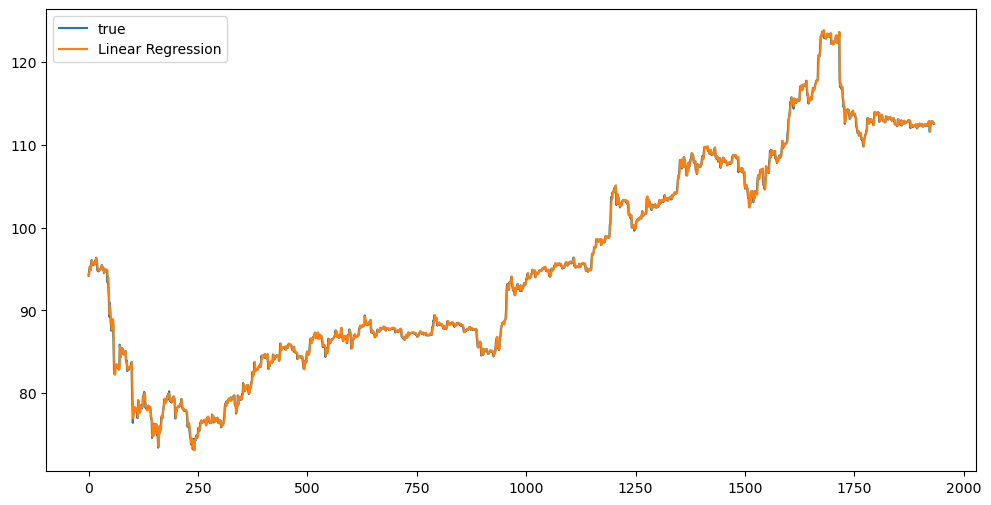

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="true")
plt.plot(y_pred_lr, label="Linear Regression")
plt.legend()
plt.show()

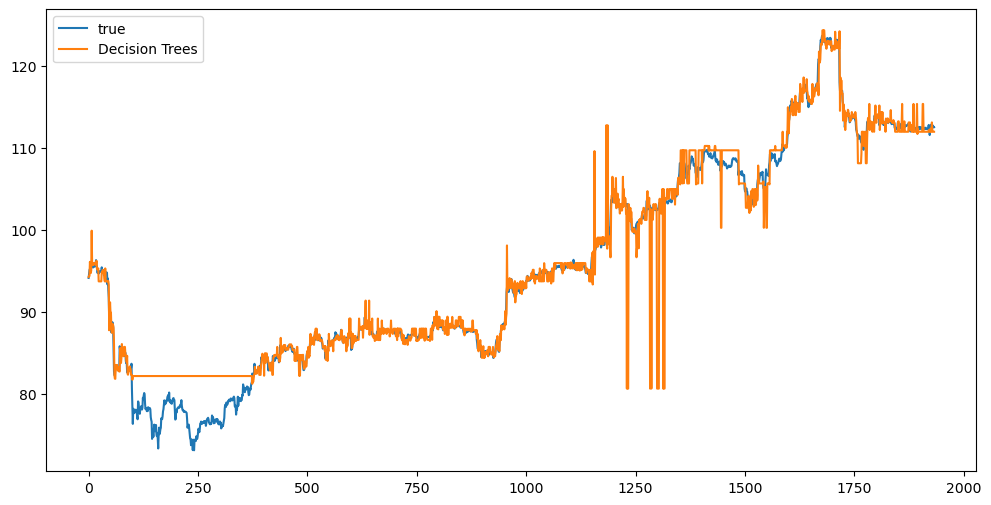

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="true")
plt.plot(y_pred_dt, label="Decision Trees")
plt.legend()
plt.show()

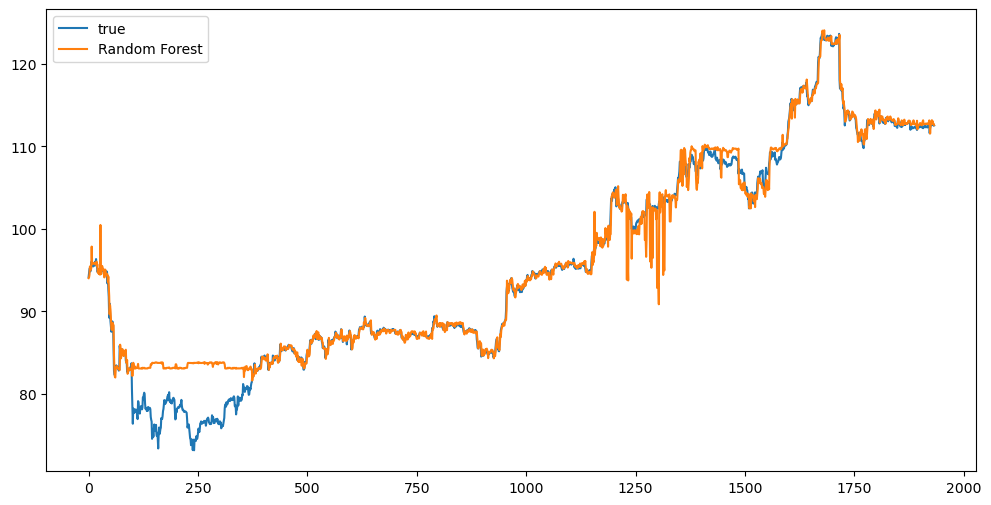

In [25]:

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="true")
plt.plot(y_pred_rf, label="Random Forest")
plt.legend()
plt.show()

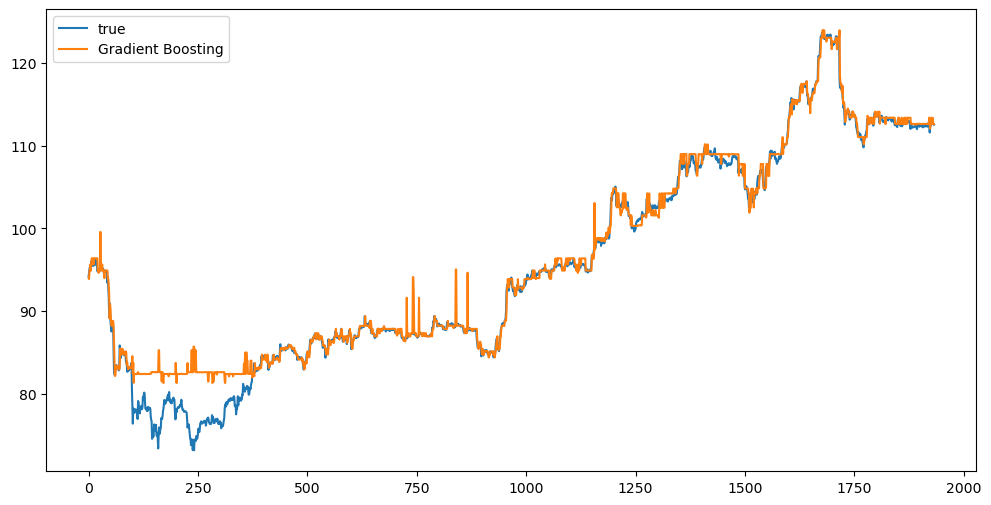

In [26]:

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="true")
plt.plot(y_pred_gb, label="Gradient Boosting")
plt.legend()
plt.show()